In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

In [2]:
# binary trend model data
multi_stock = pd.read_csv(os.path.join("Resources", "Model Data", "multi_outcome_with_stock.csv"))
multi_stock = multi_stock.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Date'])
multi_stock.dropna(inplace=True)
multi_stock.sort_values(by='Search Date').head()

,Multi_Class,Search Date,alcoholism,anxiety,athleisure,cutting hair,depression,dry cough,eczema,fever,...,PFE_Difference,PFE_Volume,AZN_Open,AZN_Close,AZN_Difference,AZN_Volume,NVAX_Open,NVAX_Close,NVAX_Difference,NVAX_Volume
751,0-549,2020-01-24,52,78,42,22,75,16,72,38,...,-0.05,20875735.0,48.62,48.51,0.11,1990900.0,7.26,6.81,0.45,4195600.0
750,0-549,2020-01-25,39,69,14,33,56,19,84,42,...,0.37,31150865.0,48.76,48.76,0.00,1698800.0,6.63,7.01,-0.38,4168300.0
749,0-549,2020-01-26,38,69,41,23,55,16,61,39,...,-0.30,29443490.0,49.46,49.73,-0.27,2303000.0,6.90,6.97,-0.07,2158500.0
748,0-549,2020-01-27,48,82,22,24,80,18,60,40,...,0.17,21047748.0,49.69,50.03,-0.34,2531000.0,6.89,6.84,0.05,1457600.0
747,0-549,2020-01-28,44,86,41,22,86,17,63,44,...,0.29,21903596.0,49.89,49.40,0.49,1995500.0,6.76,6.31,0.45,2607200.0


In [3]:
multi_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 12 to 751
Columns: 104 entries, Multi_Class to NVAX_Volume
dtypes: float64(51), int64(47), object(6)
memory usage: 420.8+ KB


In [4]:
multi_stock.sort_values(by='Search Date').tail()

,Multi_Class,Search Date,alcoholism,anxiety,athleisure,cutting hair,depression,dry cough,eczema,fever,...,PFE_Difference,PFE_Volume,AZN_Open,AZN_Close,AZN_Difference,AZN_Volume,NVAX_Open,NVAX_Close,NVAX_Difference,NVAX_Volume
16,1699-5000,2022-01-28,43,76,40,26,59,18,63,31,...,0.09,32358500.0,56.19,56.68,-0.49,7816900.0,90.36,94.80,-4.44,6481200.0
15,1699-5000,2022-01-29,30,73,46,27,46,12,76,29,...,-1.06,67922000.0,56.55,56.65,-0.10,7632300.0,85.02,83.45,1.57,9114900.0
14,1699-5000,2022-01-30,39,75,100,35,52,14,81,38,...,0.17,38522200.0,56.99,57.20,-0.21,5571100.0,84.08,91.79,-7.71,5341100.0
13,1699-5000,2022-01-31,42,90,45,25,72,14,71,38,...,0.44,34200600.0,58.16,58.60,-0.44,14540200.0,87.18,88.00,-0.82,4925700.0
12,1699-5000,2022-02-01,43,88,17,23,70,14,80,32,...,-0.45,34970000.0,58.08,58.04,0.04,9038200.0,90.16,90.44,-0.28,4131200.0


In [5]:
x = multi_stock.drop(["Multi_Class", "Search Date","DJIA_Open", "DJIA_Close", "DJIA_Difference", "DJIA_Volume"], axis=1)
#x.head()

y = multi_stock['Multi_Class']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [7]:
#scale the data
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(x_train)

In [8]:
#transform the training and testing data by using the x_scaler and y_sclaler models
x_train_scaled = x_scaler.transform(x_train)
x_trst_scaled = x_scaler.transform(x_test)

k: 1, Train/Test Score: 1.000/0.736
k: 3, Train/Test Score: 0.852/0.736
k: 5, Train/Test Score: 0.805/0.760
k: 7, Train/Test Score: 0.820/0.767
k: 9, Train/Test Score: 0.818/0.744
k: 11, Train/Test Score: 0.776/0.760
k: 13, Train/Test Score: 0.784/0.752
k: 15, Train/Test Score: 0.771/0.744
k: 17, Train/Test Score: 0.766/0.744
k: 19, Train/Test Score: 0.755/0.767


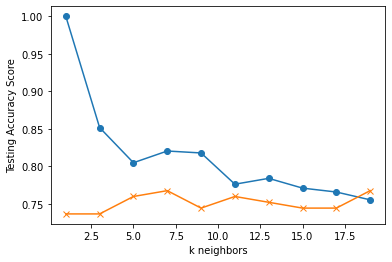

0.7552083333333334
0.7674418604651163


In [9]:
# loop through different k values to find which has the highest accuracy
# only odd numbers
train_scores =[]
test_scores = []
for k in range (1, 20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1,20,2), train_scores, marker='o')
plt.plot(range(1,20,2), test_scores, marker='x')
plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()
print(train_score)
print(test_score)

In [10]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
print('k=11 Test Acc: %.3f' %knn.score(x_test, y_test))

#new_binary_data = [[]]
#predicted_class=knn.predict(new_binary_data)
#print(predicted_class)

k=11 Test Acc: 0.760
